In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from collections import Counter
import pprint

In [3]:
# generate hemoglobin data for patients
hemo_list = dict()

# generate chf patients' ids
chf_patients = list()

# generate all patients' ids
name_list = list()

# gemerate encounters of congestive heart failure
chf_list = dict()

for file in glob.glob('./data/*'):
    hemo_data = dict()
    chf_data = list()
    data = pd.read_json(file)
    count = data['entry'].count()
    name = data['entry'][0]['resource']['id']
    name_list.append(name)
    for i in range(count):
        if data['entry'][i]['resource']['resourceType'] == 'Observation':
            resource = data['entry'][i]['resource']
            if resource['code']['coding'][0]['code'] == '718-7':
                time = resource['effectiveDateTime'][0:10]
                value = resource['valueQuantity']['value']
                hemo_data[time] = value
        if data['entry'][i]['resource']['resourceType'] == 'Encounter':
            resource = data['entry'][i]['resource']
            if 'reasonCode' in resource:
                if resource['reasonCode'][0]['coding'][0]['code'] == '88805009':
                    time = resource['period']['start'][0:10]
                    chf_data.append(time)
                    if name not in chf_patients:
                        chf_patients.append(name)
                
    hemo_list[name] = hemo_data
    chf_list[name] = chf_data

In [33]:
pprint.pprint(hemo_list)
pprint.pprint('----------------------------------------')
pprint.pprint(chf_list)

{'00a0d089-9f54-470f-808e-1c55835b2478': {'2012-09-26': 14.596,
                                          '2017-10-25': 13.136},
 '0127965a-7f00-43b8-92e3-ed57cc7f952c': {'1975-08-26': 16.677,
                                          '1980-09-23': 15.087},
 '01c7c2ec-1d9e-4364-a38e-73d990e4b0b6': {'2008-01-05': 12.495,
                                          '2012-12-11': 10.495,
                                          '2013-01-05': 15.419},
 '02bff56c-3bcb-4e5a-acda-9271374ca201': {'2014-06-06': 16.029,
                                          '2019-07-05': 17.179},
 '03095e62-1167-4e36-b8d2-04c252695137': {'2012-03-28': 12.64,
                                          '2018-08-08': 14.021},
 '031859c2-5195-4118-9e55-b589da81bb5d': {'2012-02-04': 16.352,
                                          '2017-03-04': 15.27},
 '031e6e4e-132b-4bd9-b61a-2093eea3dbcb': {'2017-01-21': 15.831},
 '038058df-bb01-3ea2-ac61-63335db46726': {},
 '050362b0-412e-444e-ac1c-718d1bfcd3c9': {'1993-05-27'

 '2cdf62d2-f842-4f8d-a867-3f9ca9ec55d7': {'2013-07-31': 12.556000000000001,
                                          '2018-08-29': 12.702},
 '2ce27e3f-d281-4dc5-a8ae-5a5a0e600a84': {'1977-11-20': 15.194,
                                          '1982-12-19': 13.896},
 '2cfaf72f-aaba-4009-a588-92e0b2a5d21a': {'1986-05-03': 14.15,
                                          '1991-06-01': 14.877,
                                          '1993-01-25': 11.088},
 '2d36c307-3c20-4a7a-a5ba-ded541006387': {'2011-05-01': 15.095,
                                          '2017-04-23': 12.476,
                                          '2019-05-05': 11.878},
 '2d7e4fc8-3d2c-49c2-a8d9-36019d411f4d': {'2013-12-31': 15.326,
                                          '2019-01-29': 16.902},
 '2edb9ce2-701c-456a-8f81-a6d824fb3546': {'1996-09-25': 14.614,
                                          '2001-10-24': 16.051},
 '2ee95cea-9ad6-4783-be42-5395da225dbb': {'1986-01-05': 12.537,
                       

                                          '2010-10-10': 10.582},
 '5d8ddc76-5d43-4488-9e1f-55b644605a57': {'2012-02-04': 16.352,
                                          '2017-03-04': 15.27},
 '5e7529b9-941e-411f-87ee-e02f8816a8ac': {'2012-10-19': 17.482,
                                          '2017-11-17': 12.448},
 '5f306708-b1b0-4812-ada8-cd6cff598253': {'2012-09-26': 14.596,
                                          '2017-10-25': 13.136},
 '5f4526a1-3245-466e-b1dc-e0c7466ebd09': {'2014-10-29': 14.874},
 '601c33ba-944e-449c-a5a5-1adda05abe85': {'2007-03-24': 13.195,
                                          '2012-04-21': 13.517},
 '601c98d3-c3c3-4afd-94de-5b83a4fd47fb': {'2011-05-14': 12.353,
                                          '2016-06-11': 13.606},
 '60472c16-c7cf-4280-b593-70138b3453db': {'2011-06-04': 15.09,
                                          '2017-06-24': 15.894},
 '60d0edde-6011-4730-9672-383881ee4ceb': {'2012-02-04': 16.352,
                                  

                                          '2018-08-29': 12.702},
 '8eb96da3-693e-4e80-b117-0d9f13f45cc6': {'2012-11-13': 17.394,
                                          '2017-12-12': 14.259},
 '8ec1e875-0241-4ce7-b232-c27811b607aa': {'2011-01-05': 15.939,
                                          '2016-02-03': 16.207,
                                          '2018-01-03': 9.8799,
                                          '2018-01-04': 11.099},
 '8eeea975-74ff-4951-b6c3-2ea648fb4074': {'2010-01-27': 15.156},
 '8f11a741-a356-49ca-8159-0e8c68cdce4d': {'2012-02-04': 16.352,
                                          '2017-03-04': 15.27},
 '90b2d0f0-56a7-47b7-8f7f-536686b443a8': {'2002-05-11': 14.34,
                                          '2007-05-19': 15.817},
 '9132d5b5-488b-46c8-be6d-9157a062258f': {'2006-04-15': 15.741,
                                          '2011-05-14': 15.196},
 '91f3c391-9ae1-405e-b1e0-b5c2859a79f0': {'2016-02-21': 13.803},
 '92599177-ee3c-45f1-bdf5-e20a2240

 'c51953ff-458e-4327-b2fe-48c41b4179e2': {'2010-06-28': 13.616,
                                          '2015-07-27': 13.876},
 'c535460c-8121-3452-90a5-e593b278820a': {},
 'c593c545-b9a0-4c45-b6db-b50fa744b2d4': {'2011-04-29': 13.65,
                                          '2017-05-19': 13.339},
 'c62390e2-76df-498c-85e5-5d808a8a3d0c': {'2015-07-05': 16.824},
 'c6437ccc-6c5e-40ad-9d55-403f2dbb92f9': {'2012-03-07': 15.711,
                                          '2017-04-05': 15.508},
 'c69e93ca-d313-4288-9d8a-e8697104ad5c': {'2012-11-13': 17.394,
                                          '2017-12-12': 14.259},
 'c6a9f099-dced-4678-86a2-d55919e49e62': {'2012-12-17': 13.352,
                                          '2018-01-15': 16.375},
 'c709b0ab-3541-405b-a67b-9256aa7e0df1': {'2002-02-10': 15.361,
                                          '2007-03-11': 16.108},
 'c78579fe-2feb-414b-aaef-f6fb7f86dea4': {'2011-11-08': 11.671,
                                          '2014-07-15

 'f02de67f-6300-4f20-8002-ff77c2c8d8f3': {'2002-02-20': 14.376,
                                          '2007-03-21': 13.779},
 'f03417e4-76ed-47fd-b0e1-2d91752dacc5': {'2008-10-31': 16.557,
                                          '2013-11-29': 13.255},
 'f0b100b4-1b37-483c-aea8-0f13a09f08ab': {'2004-01-16': 16.937,
                                          '2009-02-13': 16.756},
 'f16044f5-5c17-4a37-a956-88dcd727d08a': {'2001-07-28': 15.208,
                                          '2006-08-26': 13.809},
 'f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4': {},
 'f2e42707-b2f1-4411-a1fb-1b698e0ac2ae': {'2011-07-26': 17.312,
                                          '2017-07-11': 16.044},
 'f2e43424-c1e7-4062-82fa-5db88402f3ac': {'2002-02-19': 15.963,
                                          '2007-03-20': 14.176},
 'f48b06f5-29c3-4fb0-917b-c3772bf54e9c': {'1986-05-03': 14.15,
                                          '1991-06-01': 14.877,
                                          '1993-01-25'

                                          '2013-10-09',
                                          '2014-04-07',
                                          '2015-09-29',
                                          '2017-03-22',
                                          '2017-09-18',
                                          '2017-09-18'],
 'c0948be1-2a9c-4a70-8c62-d851cba7df84': [],
 'c1426288-f1b6-482e-9b1a-2ab27e2a811d': [],
 'c1653a40-f668-471d-b991-108b19ae61ea': [],
 'c1a22f61-96ca-4b8f-9e4d-7b1ef1477501': ['2012-08-20',
                                          '2012-09-10',
                                          '2013-03-09',
                                          '2013-03-09'],
 'c232c0a6-bedc-4d16-b2d4-f84f80e70539': ['1990-06-22',
                                          '1990-07-13',
                                          '1991-01-09',
                                          '1991-01-09'],
 'c2bc521e-04dd-4198-830e-3b0241f56ea0': [],
 'c4cc8ef1-f667-4dfa-8ae1-8196e24

                                          '2018-01-26',
                                          '2018-07-25',
                                          '2018-07-25'],
 'e359bf10-53ec-4113-b8ed-4faac0c9eef5': [],
 'e3ba04e5-3181-4db1-ac6f-f87a9b8c14ec': [],
 'e4026b81-4e6d-4121-878a-4141387440e1': [],
 'e4219dd1-c468-48ee-93ad-3324388fd0b8': [],
 'e4320025-ca92-4196-84a3-4b8be65c70d3': [],
 'e4a1ec35-b4d7-4930-8824-8df9e94bdb52': ['2005-11-03',
                                          '2005-11-24',
                                          '2007-05-18',
                                          '2007-11-14',
                                          '2007-11-14'],
 'e54b1024-07ff-40ad-9783-4c226bf10800': [],
 'e5d784a0-8495-4f16-814a-797f59a0f69d': [],
 'e61fe3c4-b307-46b2-b66e-cfb1a7c87575': [],
 'e7f6d057-a93c-4cf1-be92-43e5f70cbf4e': [],
 'e8351368-4772-428b-9f7d-51b8e38c86fa': [],
 'e8379b94-8e97-42f1-bcc6-5b087505533a': [],
 'e847f856-61d8-4020-bad4-298c7f0249dc': ['2005-01-14',

#### Distribution of average hemoglobin value of CHF patients:

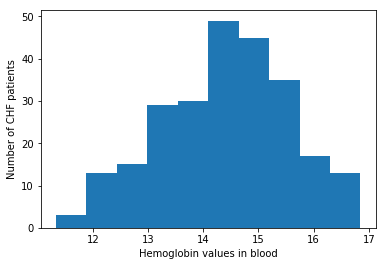

In [4]:
# avg value of people with chf
mean_list_chf = []
for person in chf_patients:
    values = hemo_list[person]
    list_chf = list(hemo_list[person].values())
    if len(list_chf) != 0:
        mean = sum(list_chf)/len(list_chf)
        mean_list_chf.append(mean)
df_chf = pd.DataFrame(mean_list_chf, columns=['Mean'])

plt.hist(mean_list_chf)
plt.xlabel('Hemoglobin values in blood')
plt.ylabel('Number of CHF patients')
plt.show()

#### Distribution of average hemoglobin value of non CHF patients:

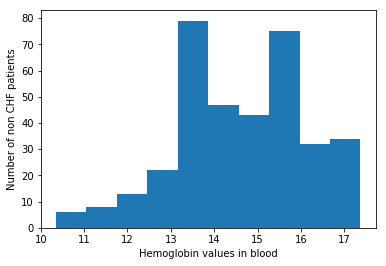

In [5]:
# avg value of people w/o chf
mean_list_nonchf = []
for person in name_list:
    if person not in chf_patients:
        values = hemo_list[person]
        list_nonchf = list(hemo_list[person].values())
        if len(list_nonchf) != 0:
            mean = sum(list_nonchf)/len(list_nonchf)
            mean_list_nonchf.append(mean)
df_nonchf = pd.DataFrame(mean_list_nonchf, columns=['Mean'])

plt.hist(mean_list_nonchf)
plt.xlabel('Hemoglobin values in blood')
plt.ylabel('Number of non CHF patients')
plt.show()

In [28]:
count_chf = df_chf.shape[0]
df_chf.insert(1, "CHF", [1 for i in range(count_chf)], True)

count_nonchf = df_nonchf.shape[0]
df_nonchf.insert(1, "CHF", [0 for i in range(count_nonchf)], True)

In [35]:
df_total = df_chf.append(df_nonchf)
# df_total.drop(columns="CHF")
df_total

,Mean,CHF,CHF,CHF,CHF,CHF,CHF,CHF
0,14.890000,1,1,1,1,1,1,1
1,14.323000,1,1,1,1,1,1,1
2,13.849000,1,1,1,1,1,1,1
3,16.414000,1,1,1,1,1,1,1
4,15.743500,1,1,1,1,1,1,1
5,15.041500,1,1,1,1,1,1,1
6,14.710000,1,1,1,1,1,1,1
7,15.005000,1,1,1,1,1,1,1
8,13.660000,1,1,1,1,1,1,1
9,14.748500,1,1,1,1,1,1,1


In [36]:
df_total.shape[0]

608

In [51]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [108]:
# split datasets into train and test datasets
num_obs = df_total.shape[0]
train = df_total[:int(num_obs*0.7)]
test = df_total[int(num_obs*0.7):]

x_train = train.iloc[:, 0:1]
y_train = train.iloc[:,-1]

x_test = test.iloc[:, 0:1]
y_test = test.iloc[:,-1]

x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
x_train = x_train.reshape(-1)
x_test = x_test.reshape(-1)

y_train.shape

torch.Size([425])

In [104]:
class LogisticR(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticR, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [105]:
model = LogisticR(1, 1)

criterion = nn.CrossEntropyLoss() 
epochs = 1000
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [106]:
all_accuracy = []
all_loss = []
counter = 0

for epoch in range(epochs+1):
    train_inputs = Variable(x_train)
    true_train = Variable(y_train)
    
    optimizer.zero_grad()
    
    train_outputs = model(train_inputs)
    
    loss = criterion(train_outputs, true_train) 
    loss.backward()
    optimizer.step()
    
    if epoch % 50 == 0:
        all_loss.append(loss.item())
        print('epoch:', epoch, 'loss:', loss.item())

RuntimeError: size mismatch, m1: [1 x 425], m2: [1 x 1] at C:\w\1\s\tmp_conda_3.7_100118\conda\conda-bld\pytorch_1579082551706\work\aten\src\TH/generic/THTensorMath.cpp:136

In [ ]:
epoch = [x for x in range(0, 1001, 50)]
import matplotlib.pyplot as plt
plt.title('Loss and Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epoch, all_loss)